# ANALYSES


### PART 1: Descriptive statistics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import glob
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',20)

In [4]:
files_names = glob.glob('data/hotels_*.csv')
dfs = []
for file_name in files_names:
    df = pd.read_csv(file_name)
    print(file_name, df.shape)
    dfs.append(df)
hotels = pd.concat(dfs, ignore_index=True)
print(hotels.shape)

data\hotels_Central America.csv (2111, 93)
data\hotels_Central Asia.csv (3383, 93)
data\hotels_Eastern Africa.csv (1452, 93)
data\hotels_Eastern Asia.csv (10687, 93)
data\hotels_Eastern Europe.csv (23953, 93)
data\hotels_Northern Africa.csv (4498, 93)
data\hotels_Northern America.csv (5381, 93)
data\hotels_Northern Europe.csv (23247, 93)
data\hotels_Oceania.csv (12190, 93)
data\hotels_South America.csv (8885, 93)
data\hotels_South-Eastern Asia.csv (10297, 93)
data\hotels_Southern Africa.csv (1985, 93)
data\hotels_Southern Asia.csv (13615, 93)
data\hotels_Southern Europe.csv (29492, 93)
data\hotels_Western Asia.csv (20520, 93)
data\hotels_Western Europe.csv (19470, 93)
(191166, 93)


In [4]:
files_names2=["hotels_Africa_2_Eastern Africa_14.csv",
"hotels_Africa_2_Northern Africa_15.csv",
"hotels_Africa_2_Southern Africa_18.csv",
"hotels_America_19_Central America_13.csv",
"hotels_America_19_Northern America_21.csv",
"hotels_America_19_South America_5.csv",
"hotels_Asia_142_Central Asia_143.csv",
"hotels_Asia_142_Eastern Asia_30.csv",
"hotels_Asia_142_South-Eastern Asia_35.csv",
"hotels_Asia_142_Southern Asia_34.csv",
"hotels_Asia_142_Western Asia_145.csv",
"hotels_Europe_150_Eastern Europe_151.csv",
"hotels_Europe_150_Northern Europe_154.csv",
"hotels_Europe_150_Southern Europe_39.csv",
"hotels_Europe_150_Western Europe_155.csv",
"hotels_Oceania_9_Oceania_9.csv"]

In [5]:
dfs = []
for file_name in files_names2:
    df = pd.read_csv("links/"+file_name)
    print(file_name, df.shape)
    dfs.append(df)
hotels_2 = pd.concat(dfs, ignore_index=True)
print(hotels_2.shape)

hotels_Africa_2_Eastern Africa_14.csv (112, 13)
hotels_Africa_2_Northern Africa_15.csv (217, 13)
hotels_Africa_2_Southern Africa_18.csv (125, 13)
hotels_America_19_Central America_13.csv (125, 13)
hotels_America_19_Northern America_21.csv (347, 13)
hotels_America_19_South America_5.csv (604, 13)
hotels_Asia_142_Central Asia_143.csv (293, 13)
hotels_Asia_142_Eastern Asia_30.csv (622, 13)
hotels_Asia_142_South-Eastern Asia_35.csv (630, 13)
hotels_Asia_142_Southern Asia_34.csv (940, 13)
hotels_Asia_142_Western Asia_145.csv (847, 13)
hotels_Europe_150_Eastern Europe_151.csv (1245, 13)
hotels_Europe_150_Northern Europe_154.csv (1088, 13)
hotels_Europe_150_Southern Europe_39.csv (1884, 13)
hotels_Europe_150_Western Europe_155.csv (862, 13)
hotels_Oceania_9_Oceania_9.csv (760, 13)
(10701, 13)


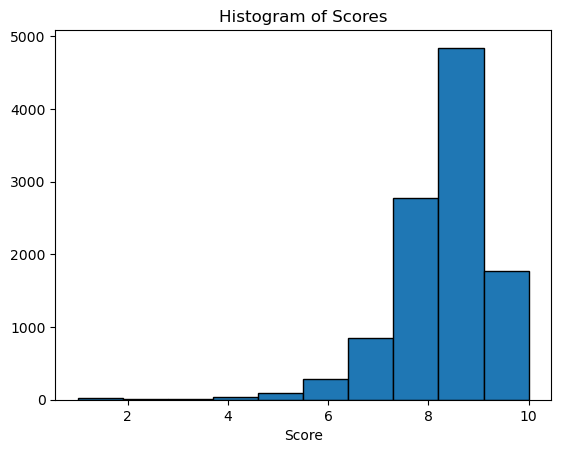

In [6]:
# make a histogram of the scores in the dataset
plt.hist(hotels_2["Score"],edgecolor='black')
# add title and labels
plt.title("Histogram of Scores")
plt.xlabel("Score")
plt.show()

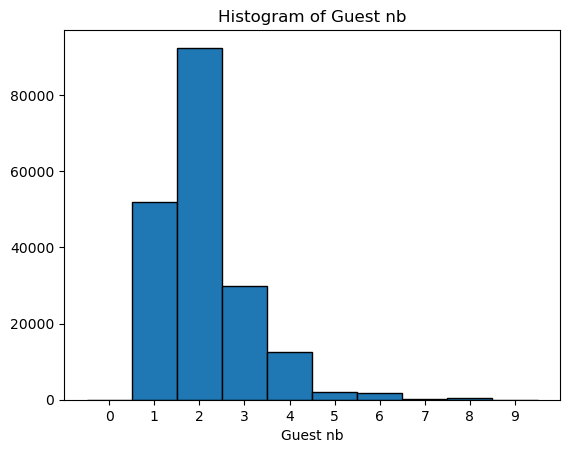

In [7]:
# plot the Guest nb the guest are bin by 1 (make it more readable more large to see the distribution) the max nb of guest is 10
plt.hist(hotels["Guests nb"], bins=np.arange(-0.5, 10, 1),edgecolor='black')
plt.title("Histogram of Guest nb")
plt.xlabel("Guest nb")
plt.xticks(range(0, 10))
plt.show()

In [8]:
# see the different values of the Room Type
print(hotels["Room Type"].value_counts())

Room Type
Standard Double Room                 4015
Twin Room                            3770
Standard Twin Room                   3577
Double Room                          3385
Family Room                          3165
                                     ... 
Double Room (12 hours) with Meals       1
Double Room (24 hours) with Meals       1
Exquisite One Bedroom Apartment         1
Selected Studio                         1
Junior Spa Suite with Sauna             1
Name: count, Length: 10332, dtype: int64


In [13]:
hotels.iloc[:,:].isnull().sum().sum()


2794

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


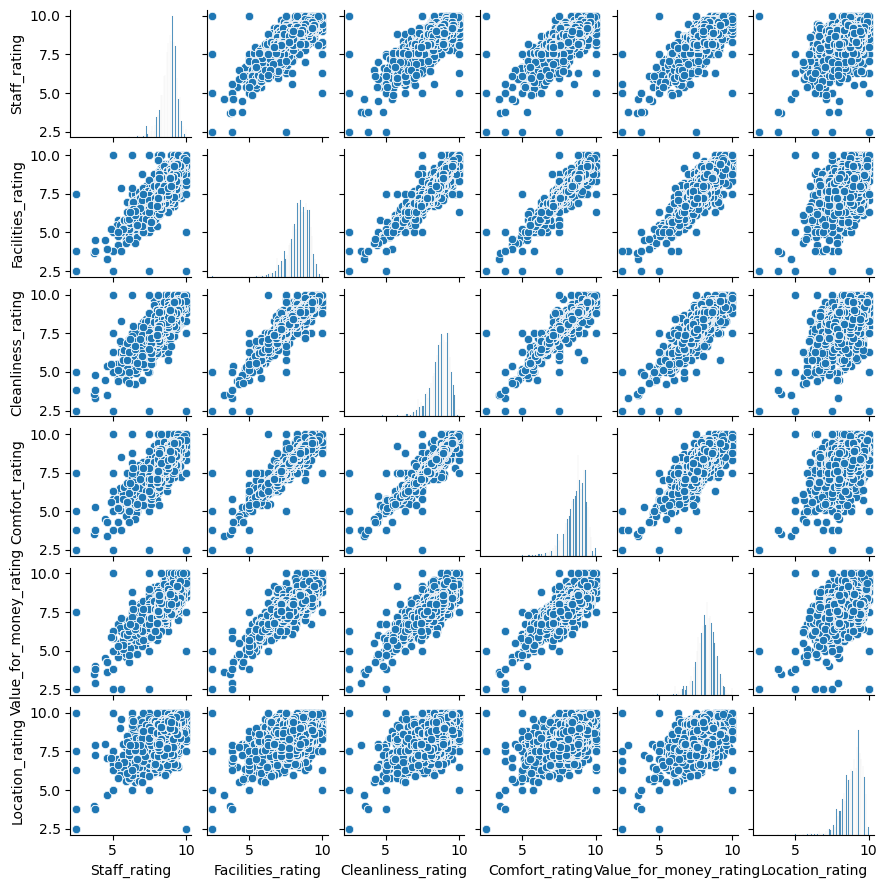

In [72]:
# sns.pairplot(hotels) just for these columns Staff_rating,Facilities_rating,Cleanliness_rating,Comfort_rating,Value_for_money_rating,Location_rating make the image smaller

sns.pairplot(hotels[["Staff_rating","Facilities_rating","Cleanliness_rating","Comfort_rating","Value_for_money_rating","Location_rating"]], height=1.5)



<Axes: >

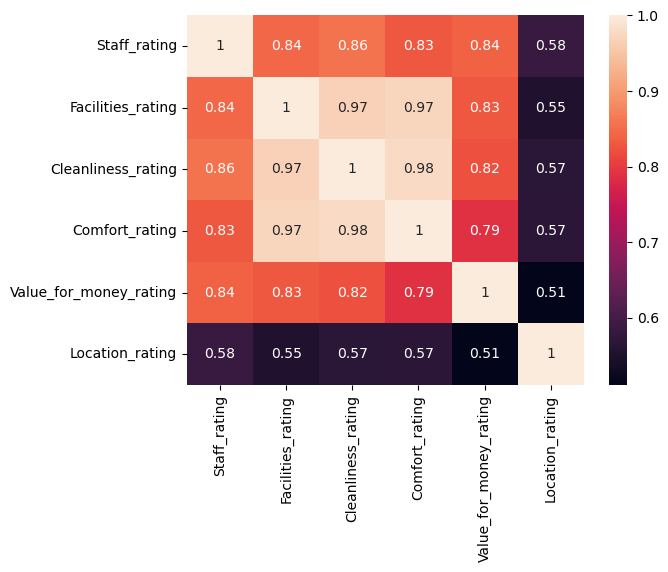

In [8]:
# same as before but with heatmap
sns.heatmap(hotels[["Staff_rating","Facilities_rating","Cleanliness_rating","Comfort_rating","Value_for_money_rating","Location_rating"]].corr(), annot=True)


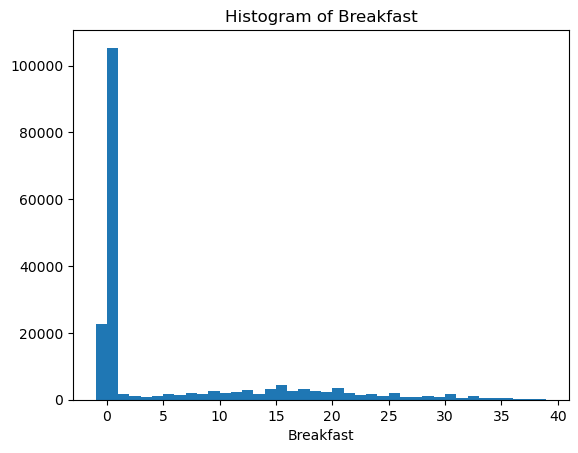

In [9]:
# breakfast is the cost of the breakfast, we can see that the price is beteen 0 and 30 and -1 if not available
plt.hist(hotels["Breakfast"], bins=np.arange(-1, 40, 1))
plt.title("Histogram of Breakfast")
plt.xlabel("Breakfast")
plt.show()


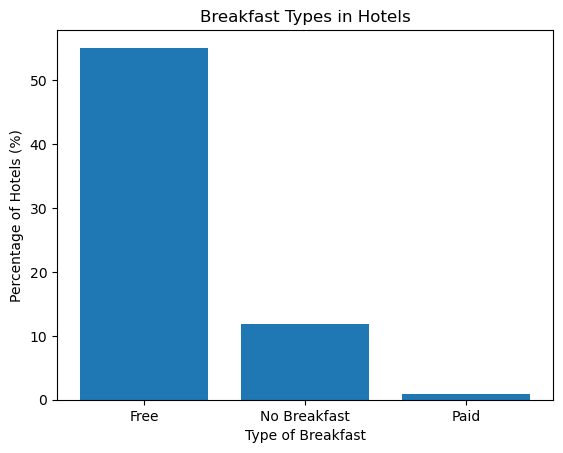

In [37]:
# brachart of the showing breakfast the percentage of hotels offering free breakfast (where value =0) , no breakfast (where value = -1) and paid breakfast (where value > 0)

# Assuming 'breakfast' is the column in your DataFrame that holds the breakfast information
breakfast_counts = hotels['Breakfast'].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(['Free', 'No Breakfast', 'Paid'], breakfast_counts[[0, -1, 1]].values)

plt.title('Breakfast Types in Hotels')
plt.xlabel('Type of Breakfast')
plt.ylabel('Percentage of Hotels (%)')

plt.show()


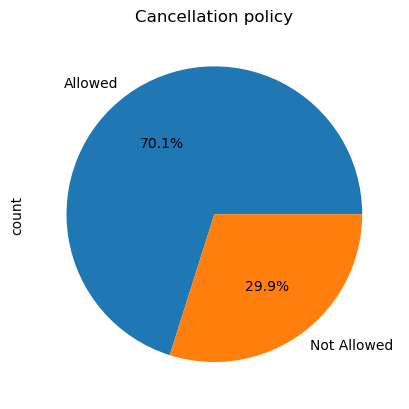

In [38]:
# Get value counts
counts = hotels["Cancellation"].value_counts()

# Define labels
labels = ['Allowed' if index == 1 else 'Not Allowed' for index in counts.index]

# Create pie chart
counts.plot.pie(autopct='%1.1f%%', labels=labels)

plt.title("Cancellation policy")
plt.show()


In [11]:

files_names=["hotels_Central America.csv",
"hotels_Central Asia.csv",
"hotels_Eastern Africa.csv",
"hotels_Eastern Asia.csv",
"hotels_Eastern Europe.csv",
"hotels_Northern Africa.csv",
"hotels_Northern America.csv",
"hotels_Northern Europe.csv",
"hotels_Oceania.csv",
"hotels_South America.csv",
"hotels_South-Eastern Asia.csv",
"hotels_Southern Africa.csv",
"hotels_Southern Asia.csv",
"hotels_Southern Europe.csv",
"hotels_Western Asia.csv",
"hotels_Western Europe.csv"]

dfs = []
for file_name in files_names:
    df = pd.read_csv("data/"+file_name)
    print(file_name, df.shape)
    dfs.append(df)
hotels = pd.concat(dfs, ignore_index=True)
print(hotels.shape)

hotels_Central America.csv (2111, 93)
hotels_Central Asia.csv (3383, 93)
hotels_Eastern Africa.csv (1452, 93)
hotels_Eastern Asia.csv (10687, 93)
hotels_Eastern Europe.csv (23953, 93)
hotels_Northern Africa.csv (4498, 93)
hotels_Northern America.csv (5381, 93)
hotels_Northern Europe.csv (23247, 93)
hotels_Oceania.csv (12190, 93)
hotels_South America.csv (8885, 93)
hotels_South-Eastern Asia.csv (10297, 93)
hotels_Southern Africa.csv (1985, 93)
hotels_Southern Asia.csv (13615, 93)
hotels_Southern Europe.csv (29492, 93)
hotels_Western Asia.csv (20520, 93)
hotels_Western Europe.csv (19470, 93)
(191166, 93)


In [12]:
america_files = ["hotels_Central America.csv","hotels_Northern America.csv","hotels_South America.csv",]
dfs = []
for file in america_files:
    df = pd.read_csv("data/"+file)
    dfs.append(df)
american_hotels = pd.concat(dfs, ignore_index=True)

asia_files = ["hotels_Central Asia.csv","hotels_Eastern Asia.csv","hotels_South-Eastern Asia.csv","hotels_Southern Asia.csv","hotels_Western Asia.csv"]
dfs = []
for file in asia_files:
    df = pd.read_csv("data/"+file)
    dfs.append(df)
asia_hotels = pd.concat(dfs, ignore_index=True)

africa_files = ["hotels_Eastern Africa.csv","hotels_Northern Africa.csv","hotels_Southern Africa.csv"]
dfs = []
for file in africa_files:
    df = pd.read_csv("data/"+file)
    dfs.append(df)
africa_hotels = pd.concat(dfs, ignore_index=True)

europe_files = ["hotels_Eastern Europe.csv","hotels_Northern Europe.csv","hotels_Southern Europe.csv","hotels_Western Europe.csv"]
dfs = []
for file in europe_files:
    df = pd.read_csv("data/"+file)
    dfs.append(df)
europe_hotels = pd.concat(dfs, ignore_index=True)

oceania_hotels = pd.read_csv("data/hotels_Oceania.csv")



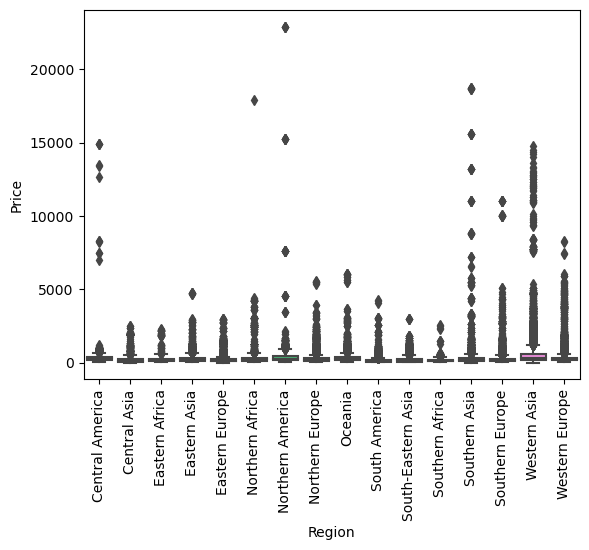

In [30]:
# compare the hotels prices in the different regions
sns.boxplot(x="Region", y="Price", data=hotels)
plt.xticks(rotation=90)
plt.show()


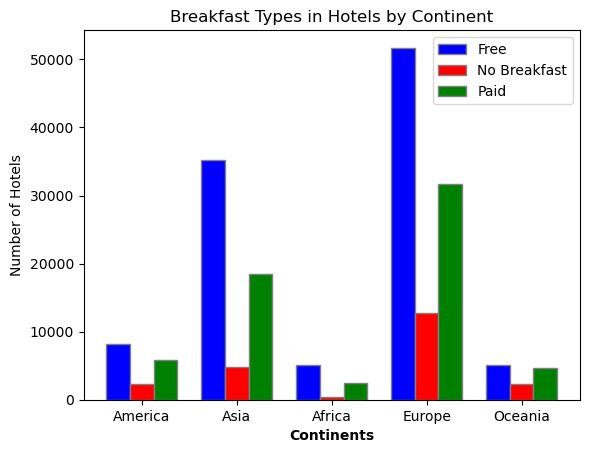

In [40]:
import numpy as np

# Assuming 'Continent' is the column in your DataFrame that holds the continent information
continents = hotels['Continent'].unique()

# Define the width of the bars
bar_width = 0.25

# Initialize the x location for each group and the width of each bar
r1 = np.arange(len(continents))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Calculate breakfast counts for each continent
free_counts = [hotels[(hotels['Continent'] == continent) & (hotels['Breakfast'] == 0)].shape[0] for continent in continents]
no_counts = [hotels[(hotels['Continent'] == continent) & (hotels['Breakfast'] == -1)].shape[0] for continent in continents]
paid_counts = [hotels[(hotels['Continent'] == continent) & (hotels['Breakfast'] > 0)].shape[0] for continent in continents]

# Create a bar chart
plt.bar(r1, free_counts, color='b', width=bar_width, edgecolor='grey', label='Free')
plt.bar(r2, no_counts, color='r', width=bar_width, edgecolor='grey', label='No Breakfast')
plt.bar(r3, paid_counts, color='g', width=bar_width, edgecolor='grey', label='Paid')

# Adding xticks
plt.xlabel('Continents', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(free_counts))], continents)

plt.title('Breakfast Types in Hotels by Continent')
plt.ylabel('Number of Hotels')
plt.legend()

plt.show()

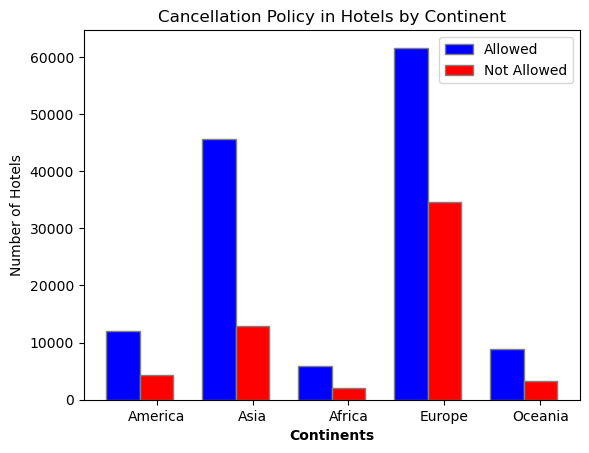

In [41]:
# Define the width of the bars
bar_width = 0.35

# Initialize the x location for each group and the width of each bar
r1 = np.arange(len(continents))
r2 = [x + bar_width for x in r1]

# Calculate cancellation policy counts for each continent
allowed_counts = [hotels[(hotels['Continent'] == continent) & (hotels['Cancellation'] == 1)].shape[0] for continent in continents]
not_allowed_counts = [hotels[(hotels['Continent'] == continent) & (hotels['Cancellation'] == 0)].shape[0] for continent in continents]

# Create a bar chart
plt.bar(r1, allowed_counts, color='b', width=bar_width, edgecolor='grey', label='Allowed')
plt.bar(r2, not_allowed_counts, color='r', width=bar_width, edgecolor='grey', label='Not Allowed')

# Adding xticks
plt.xlabel('Continents', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(allowed_counts))], continents)

plt.title('Cancellation Policy in Hotels by Continent')
plt.ylabel('Number of Hotels')
plt.legend()

plt.show()

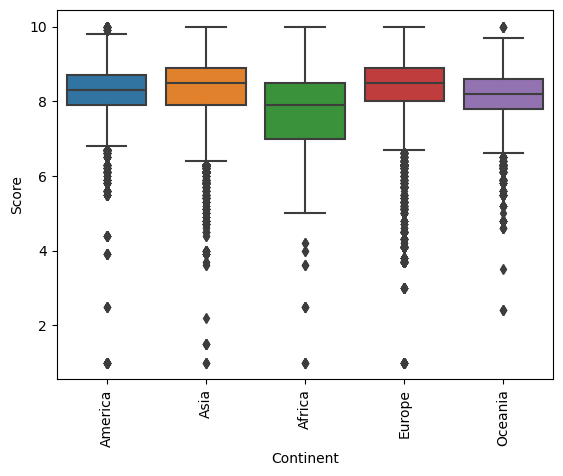

In [45]:
# score for each continent
sns.boxplot(x="Continent", y="Score", data=hotels)
plt.xticks(rotation=90)
plt.show()


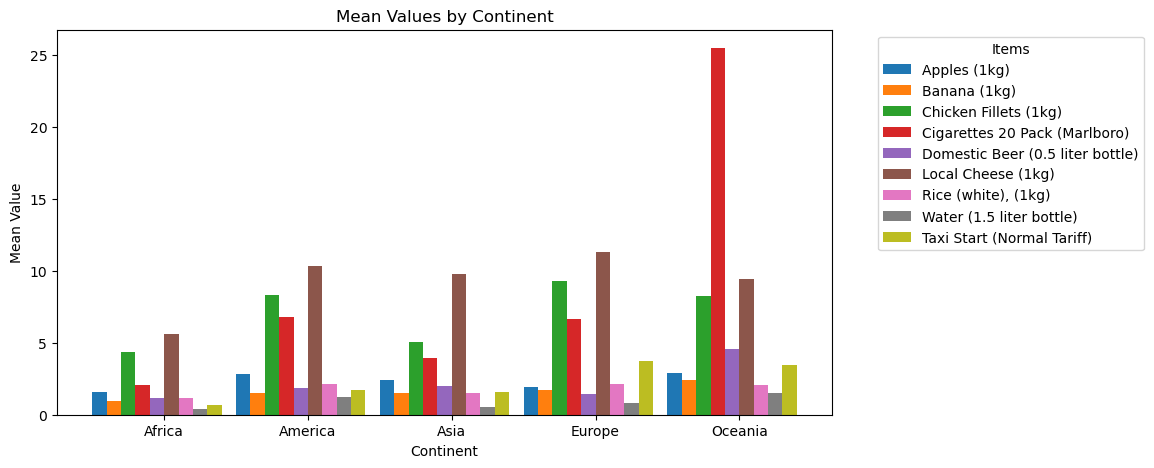

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns to compare
columns = [  "Apples (1kg)", "Banana (1kg)", "Chicken Fillets (1kg)", "Cigarettes 20 Pack (Marlboro)", "Domestic Beer (0.5 liter bottle)", "Local Cheese (1kg)", "Rice (white), (1kg)", "Water (1.5 liter bottle)","Taxi Start (Normal Tariff)"]

# Calculate mean for each column grouped by continent
mean_values = hotels.groupby('Continent')[columns].mean()

# Number of bars (group of columns) and bar width
n_bars = len(mean_values.index)
bar_width = 0.1

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))

# For each column, create a bar plot
for i, column in enumerate(columns):
    ax.bar(np.arange(n_bars) + i*bar_width, mean_values[column], width=bar_width, label=column)

# Set the x-ticks to be the continents
ax.set_xticks(np.arange(n_bars) + bar_width * (len(columns) / 2))
ax.set_xticklabels(mean_values.index)

# Add labels, title and legend
ax.set_xlabel('Continent')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values by Continent')
ax.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

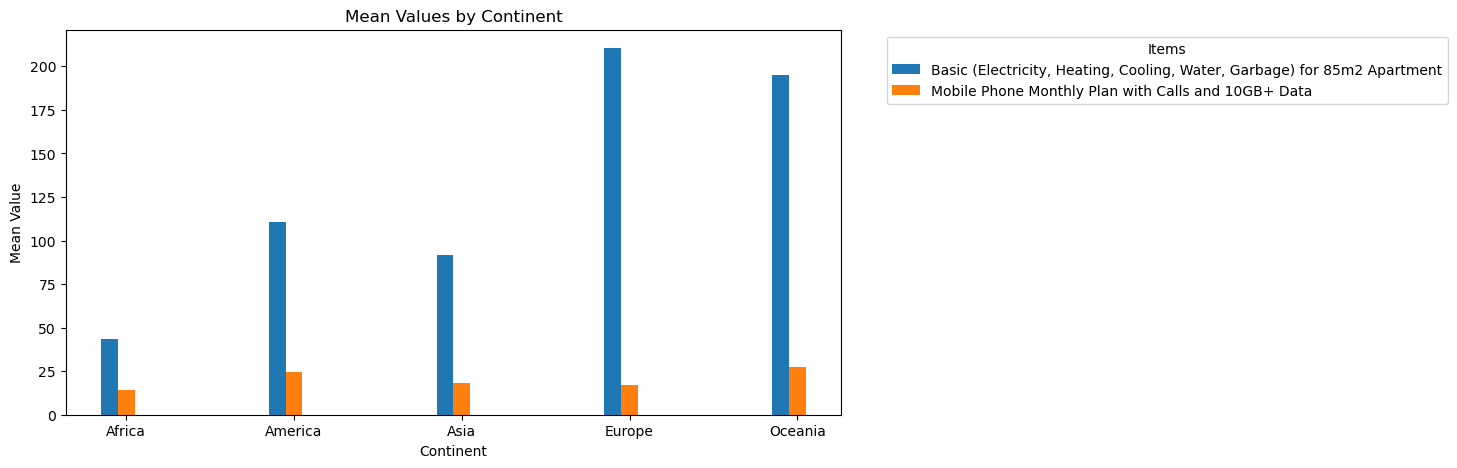

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns to compare
columns = ["Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment","Mobile Phone Monthly Plan with Calls and 10GB+ Data"]

#  "Price per Square Meter to Buy Apartment in City Centre", 
# columns = ["Price per Square Meter to Buy Apartment in City Centre", "1 Pair of Jeans (Levis 501 Or Similar)", "Apples (1kg)", "Banana (1kg)", "Chicken Fillets (1kg)", "Cigarettes 20 Pack (Marlboro)", "Domestic Beer (0.5 liter bottle)", "Local Cheese (1kg)", "Rice (white), (1kg)", "Water (1.5 liter bottle)", "Taxi Start (Normal Tariff)", "Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment", "Mobile Phone Monthly Plan with Calls and 10GB+ Data"]


# Calculate mean for each column grouped by continent
mean_values = hotels.groupby('Continent')[columns].mean()

# Number of bars (group of columns) and bar width
n_bars = len(mean_values.index)
bar_width = 0.1

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 5))

# For each column, create a bar plot
for i, column in enumerate(columns):
    ax.bar(np.arange(n_bars) + i*bar_width, mean_values[column], width=bar_width, label=column)

# Set the x-ticks to be the continents
ax.set_xticks(np.arange(n_bars) + bar_width * (len(columns) / 2))
ax.set_xticklabels(mean_values.index)

# Add labels, title and legend
ax.set_xlabel('Continent')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Values by Continent')
ax.legend(title='Items', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

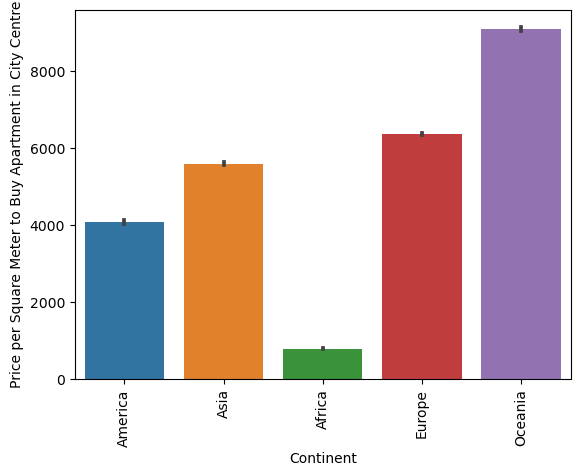

In [71]:
# "Price per Square Meter to Buy Apartment in City Centre" by continent mean value bar chart
sns.barplot(x="Continent", y="Price per Square Meter to Buy Apartment in City Centre", data=hotels)
plt.xticks(rotation=90)
plt.show()

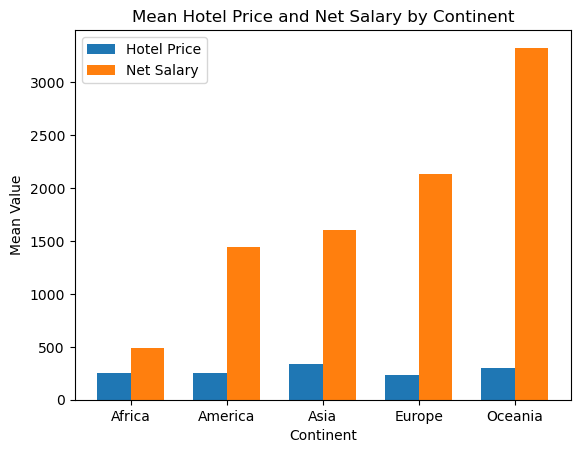

In [76]:
# hotels prices against the mean Average Monthly Net Salary (After Tax) by continent
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean hotel price and net salary for each continent
mean_hotel_price = hotels.groupby('Continent')['Price'].mean()
mean_net_salary = hotels.groupby('Continent')['Average Monthly Net Salary (After Tax)'].mean()

# Number of bars (group of columns) and bar width
n_bars = len(mean_hotel_price.index)
bar_width = 0.35

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot for hotel prices and net salaries
ax.bar(np.arange(n_bars), mean_hotel_price, width=bar_width, label='Hotel Price')
ax.bar(np.arange(n_bars) + bar_width, mean_net_salary, width=bar_width, label='Net Salary')

# Set the x-ticks to be the continents
ax.set_xticks(np.arange(n_bars) + bar_width / 2)
ax.set_xticklabels(mean_hotel_price.index)

# Add labels, title and legend
ax.set_xlabel('Continent')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Hotel Price and Net Salary by Continent')
ax.legend()

# Show the plot
plt.show()

In [79]:
# Segment the data by continent and compare average hotel prices and ratings across continents.

# Group the data by continent
grouped = hotels.groupby('Continent')

# Calculate the mean hotel price and rating for each continent
mean_price = grouped['Price'].mean()
mean_rating = grouped['Score'].mean()

# Create a new DataFrame to store the mean values
mean_values = pd.DataFrame({
    'Mean Price': mean_price,
    'Mean Rating': mean_rating
})

# Print the mean values
display(mean_values)

,Mean Price,Mean Rating
Continent,,
Africa,253.891871,7.802760
America,252.041705,8.217512
Asia,336.021811,8.320779
Europe,237.897631,8.377289
Oceania,301.569319,8.034389


In [88]:
# Calculate population quantiles
pop_quantiles = hotels['Population'].quantile([0.33, 0.66])


# Define country size based on population
def country_size(population):
        if population < pop_quantiles[0.33]:
            return 'Small'
        elif population < pop_quantiles[0.66]:
            return 'Medium'
        else:
            return 'Large'

# Apply the function to the population column to create a new country size column
hotels['Country Size'] = hotels['Population'].apply(country_size)

# Group by country size
grouped = hotels.groupby('Country Size')

# Calculate the mean hotel price for each country size
mean_price = grouped['Price'].mean()

# Calculate the mean amenities for each country size
mean_amenities = grouped['Score'].mean()

# Calculate the size of each country size category
size = grouped.size()

# Create a new DataFrame to store the mean values
mean_values = pd.DataFrame({
    'Mean Price': mean_price,
    'Mean Amenities': mean_amenities,
    'Size': size
})

# Print the mean values
display(mean_values)

,Mean Price,Mean Amenities,Size
Country Size,,,
Large,251.095182,8.090936,65779
Medium,249.852235,8.371529,63107
Small,322.236577,8.450154,62280


## Part 2:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)

C:\Users\User\AppData\Local\Temp\ipykernel_23504\1453527614.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
hotel_rooms = generate_global_df()
display(hotel_rooms.shape)
hotel_rooms.describe()

(188550, 89)

,Score,NbReviews,Staff_rating,Facilities_rating,Cleanliness_rating,Comfort_rating,Value_for_money_rating,Location_rating,Population,Yearly Change,net_change,land_area,migrants,fert_rate,med_age,urban_pop,world_share,Tourism,Tourism_year,Price per Square Meter to Buy Apartment Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,"International Primary School, Yearly for 1 Child","Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child",1 Pair of Jeans (Levis 501 Or Similar),1 Pair of Men Leather Business Shoes,1 Pair of Nike Running Shoes (Mid-Range),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",Apples (1kg),Banana (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Bottle of Wine (Mid-Range),Chicken Fillets (1kg),Cigarettes 20 Pack (Marlboro),Domestic Beer (0.5 liter bottle),Eggs (regular) (12),Imported Beer (0.33 liter bottle)_x,Lettuce (1 head),Loaf of Fresh White Bread (500g),Local Cheese (1kg),"Milk (regular), (1 liter)",Onion (1kg),Oranges (1kg),Potato (1kg),"Rice (white), (1kg)",Tomato (1kg),Water (1.5 liter bottle),Apartment (1 bedroom) Outside of Centre,Apartment (1 bedroom) in City Centre,Apartment (3 bedrooms) Outside of Centre,Apartment (3 bedrooms) in City Centre,Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle)_y,McMeal at McDonalds (or Equivalent Combo Meal),"Meal for 2 People, Mid-range Restaurant, Three-course","Meal, Inexpensive Restaurant",Water (0.33 liter bottle),Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate","Cinema, International Release, 1 Seat","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),Gasoline (1 liter),Monthly Pass (Regular Price),One-way Ticket (Local Transport),Taxi 1hour Waiting (Normal Tariff),Taxi 1km (Normal Tariff),Taxi Start (Normal Tariff),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car),"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment","Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Mobile Phone Monthly Plan with Calls and 10GB+ Data,Guests nb,Price,Breakfast,Cancellation
count,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,1.885500e+05,188550.000000,1.885500e+05,1.885500e+05,1.885500e+05,188550.000000,188550.000000,188550.000000,188550.000000,1.885500e+05,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.00000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000,188550.000000
mean,8.298411,3100.857725,8.836604,8.380893,8.672943,8.649631,8.175980,8.907875,1.702900e+08,0.491011,9.393005e+05,1.753536e+06,-7.872323e+04,1.644072,38.306619,71.824089,2.116943,1.868888e+07,2019.728030,3817.017286,5900.671364,10478.868281,595.293460,67.044673,96.808817,84.944491,38.776198,2.205122,1.660625,12.767337,9.143884,7.656641,6.873889,1.847665,2.826935,2.554317,1.253690,1.512191,10.431079,1.330579,1.331489,2.051027,1.303852,1.890453,2.408199,0.806384,718.543088,996.993291,1278.698547,1871.739668,3.039205,1.693059,4.408384,4.815928,7.77340,53.785092,10.905131,1.248918,1926.668086,7.683849,9.162644,43.815083,19.147514,1.36447

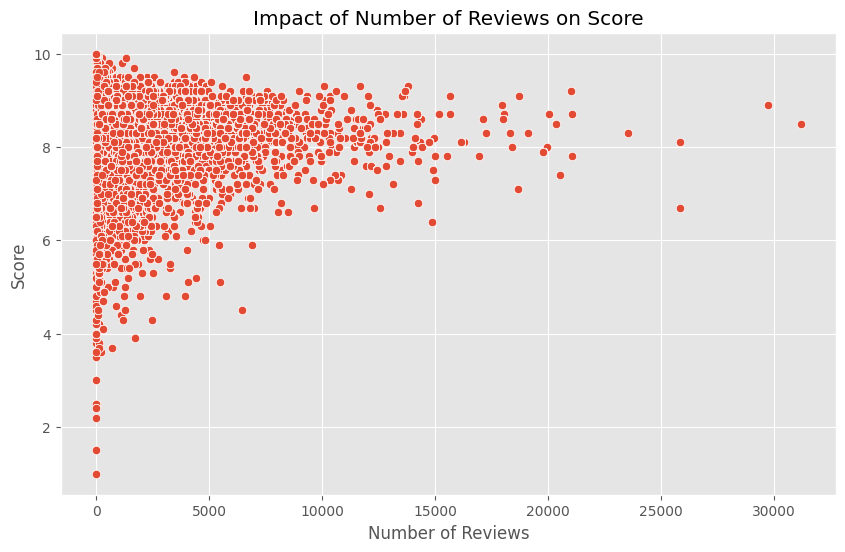

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NbReviews', y='Score', data=hotel_rooms)
plt.title('Impact of Number of Reviews on Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Score')
plt.show()

In [7]:
correlation_score_reviews = hotel_rooms['Score'].corr(hotel_rooms['NbReviews'])
print("Correlation between Score and Number of Reviews:", correlation_score_reviews)


Correlation between Score and Number of Reviews: -0.040326542591170834


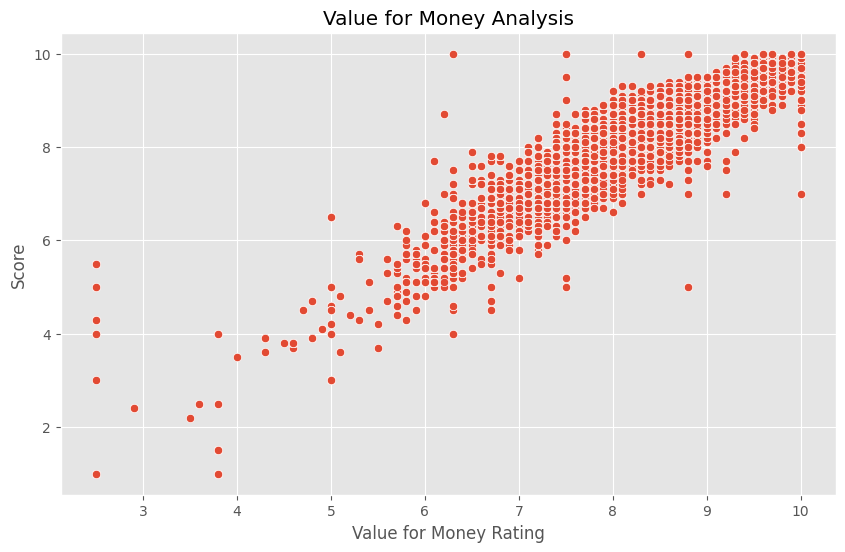

Correlation between Score and Value for Money Rating: 0.89794887950339


In [17]:
# Value for Money Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Value_for_money_rating', y='Score', data=hotel_rooms)
plt.title('Value for Money Analysis')
plt.xlabel('Value for Money Rating')
plt.ylabel('Score')
plt.show()

# Calculate correlation coefficient
correlation_score_value_for_money = hotel_rooms['Score'].corr(hotel_rooms['Staff_rating'])
print("Correlation between Score and Value for Money Rating:", correlation_score_value_for_money)

In [18]:
ratings = ['Staff_rating', 'Facilities_rating', 'Cleanliness_rating', 
           'Comfort_rating', 'Value_for_money_rating', 'Location_rating']

correlation_scores = {}

for rating in ratings:
    correlation_score = hotel_rooms['Score'].corr(hotel_rooms[rating])
    correlation_scores[rating] = correlation_score
    print(f"Correlation between Score and {rating}:", correlation_score)

    X = hotel_rooms[rating]
    y = hotel_rooms['Score']
    X = sm.add_constant(X)  # Add a constant term to the predictor
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    p_value = model.pvalues[rating]
    print("P-value for", rating, ":", p_value)
    print("\n")

# Now you have a dictionary containing the correlation scores for each rating
print("Correlation Scores:", correlation_scores)


Correlation between Score and Staff_rating: 0.89794887950339
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 7.849e+05
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:08:50   Log-Likelihood:                -64742.
No. Observations:              188550   AIC:                         1.295e+05
Df Residuals:                  188548   BIC:                         1.295e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

### kmele

One-way ANOVA test results:
F-statistic: 459.7645742846729
p-value: 0.0


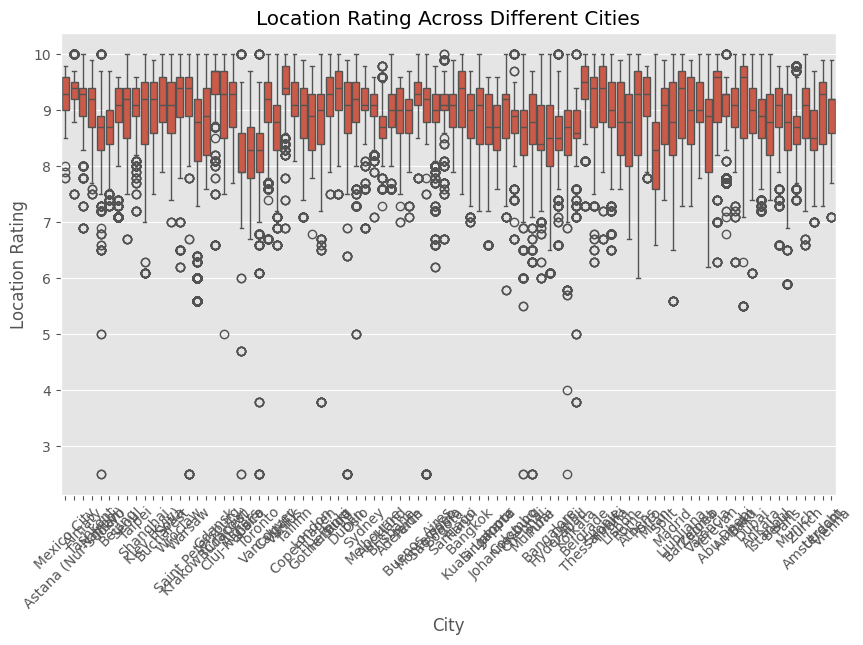

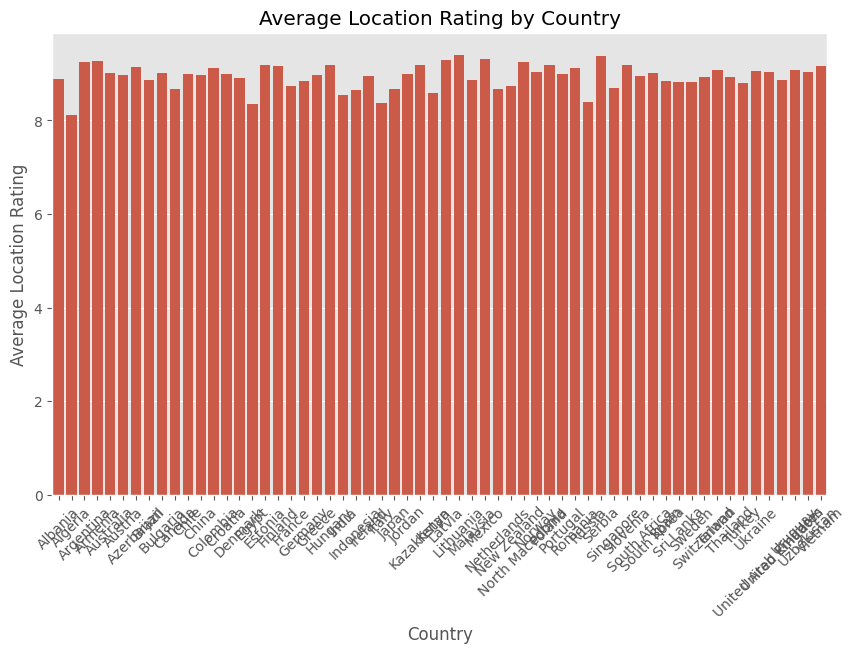

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


# Statistical Analysis
# One-way ANOVA test to compare Location_rating across different cities
f_statistic, p_value = f_oneway(*[group['Location_rating'] for name, group in hotel_rooms.groupby('City')])
print("One-way ANOVA test results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Visualization
# Box plot to visualize Location_rating distribution across different cities
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Location_rating', data=hotel_rooms)
plt.title('Location Rating Across Different Cities')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Location Rating')
plt.show()

# Bar plot to visualize average Location_rating for each country
avg_location_rating_country = hotel_rooms.groupby('Country')['Location_rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Location_rating', data=avg_location_rating_country)
plt.title('Average Location Rating by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average Location Rating')
plt.show()



Continent: Africa
One-way ANOVA test results:
F-statistic: 487.8126602463218
p-value: 2.2450332106638078e-290

Continent: America
One-way ANOVA test results:
F-statistic: 569.8708105818295
p-value: 0.0

Continent: Asia
One-way ANOVA test results:
F-statistic: 318.65447745486443
p-value: 0.0

Continent: Europe
One-way ANOVA test results:
F-statistic: 469.02051268699455
p-value: 0.0

Continent: Oceania
One-way ANOVA test results:
F-statistic: 201.3410408272977
p-value: 7.646053900475643e-207


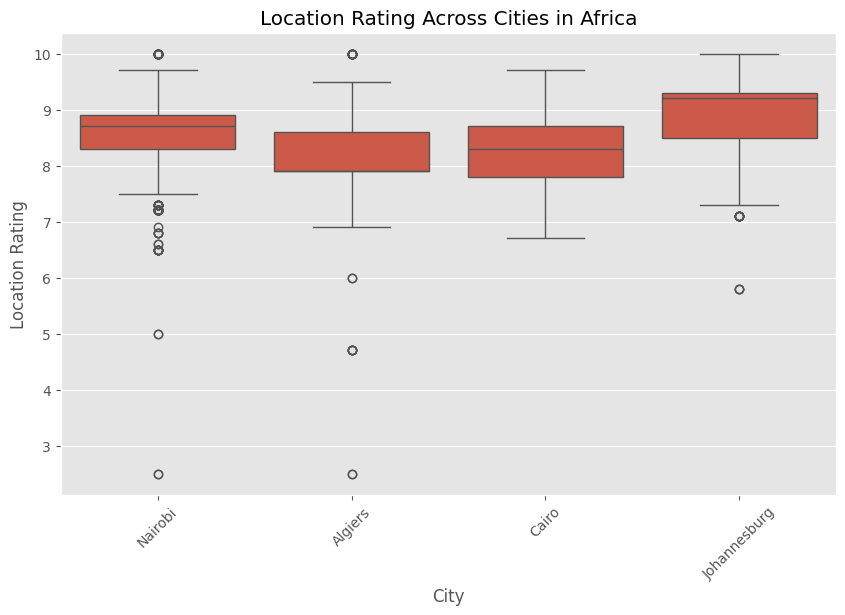

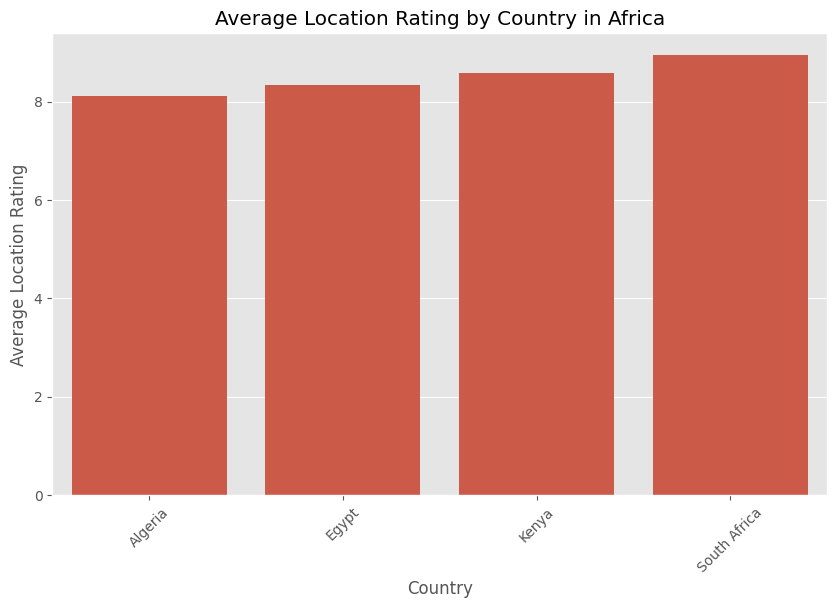

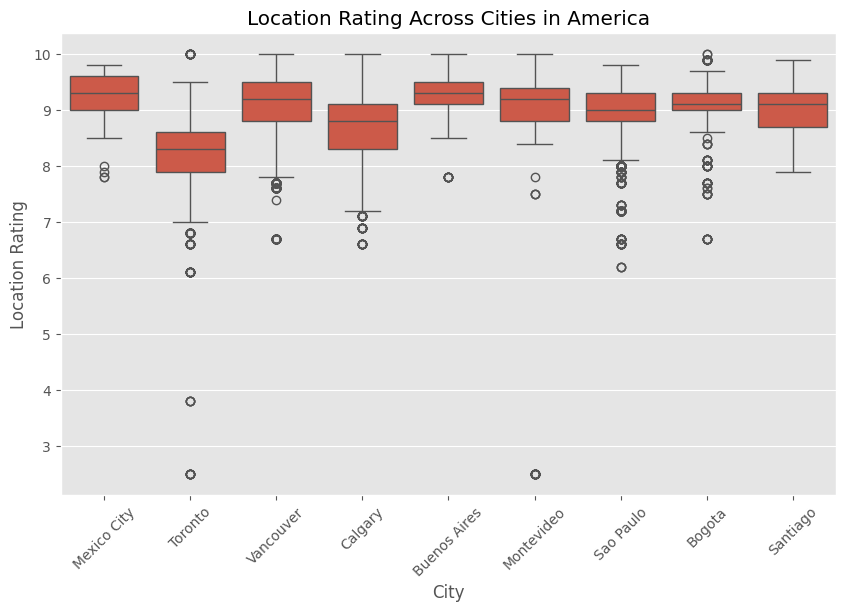

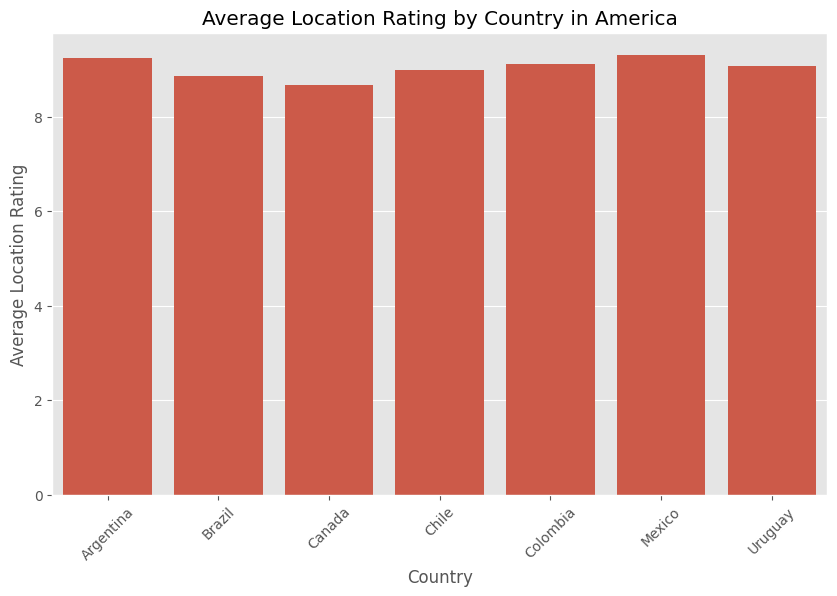

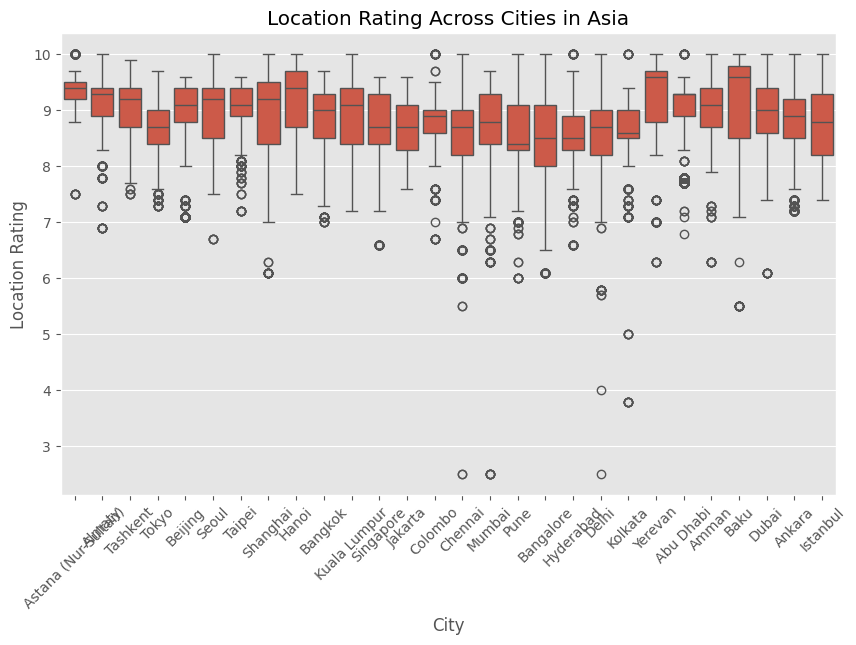

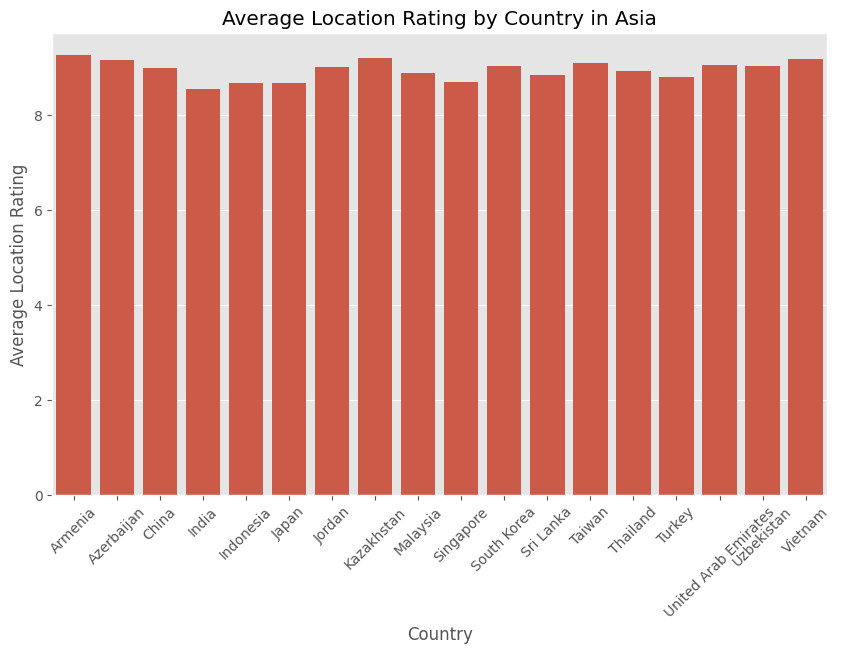

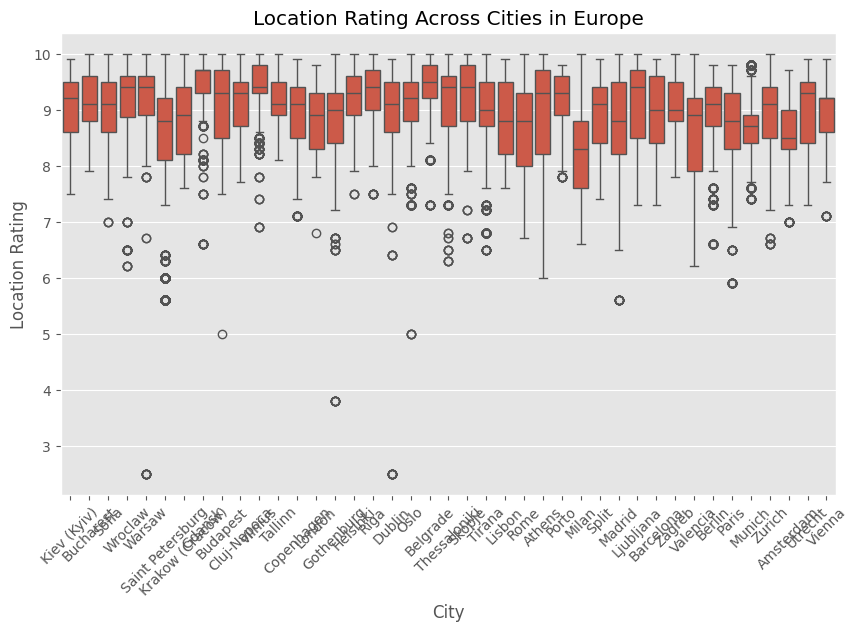

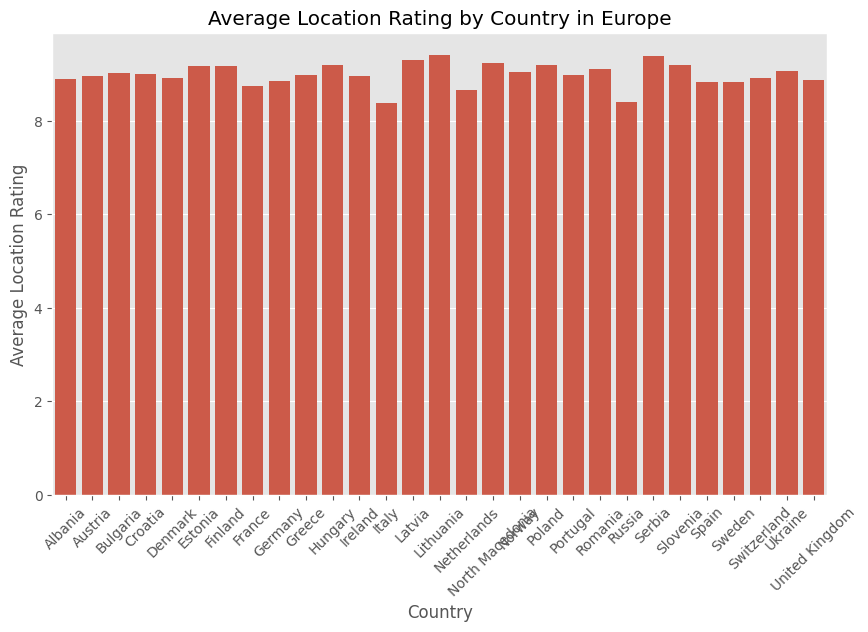

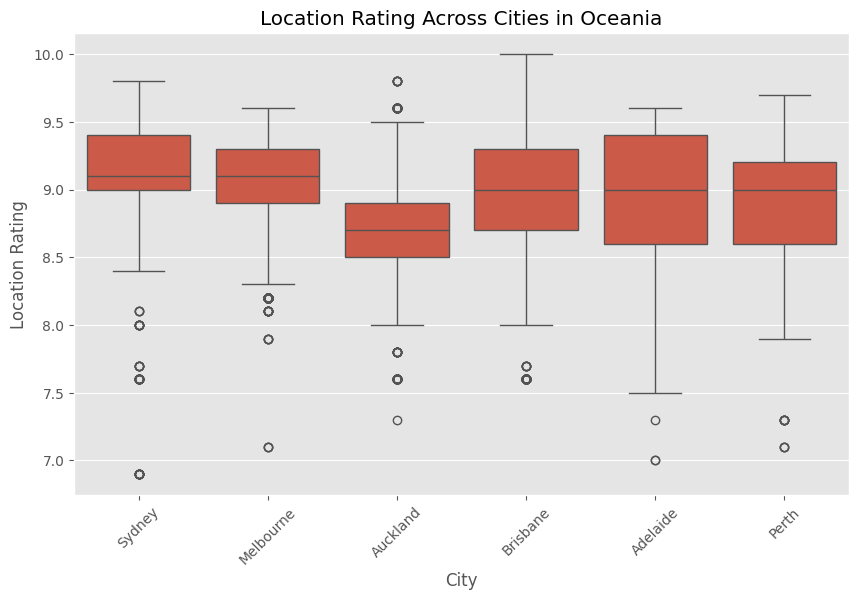

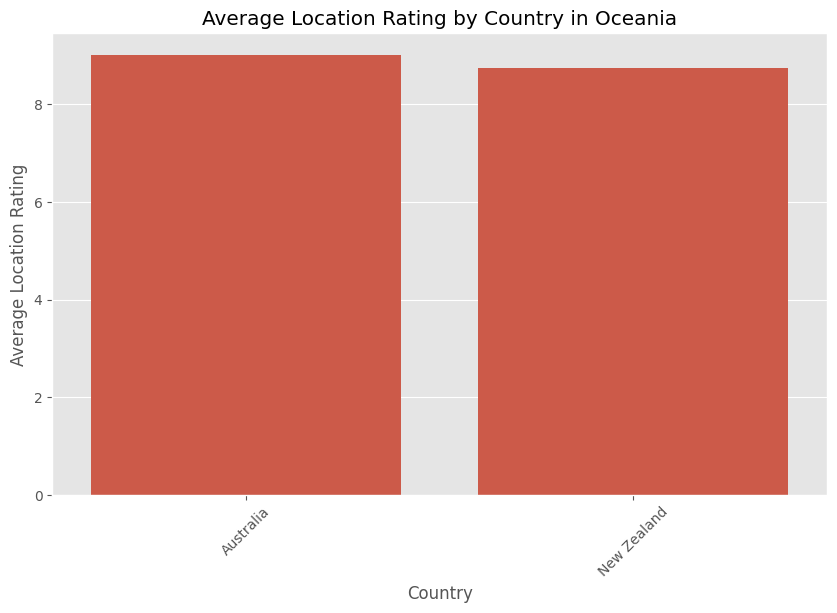

In [29]:
# Statistical Analysis for each Continent
continent_groups = hotel_rooms.groupby('Continent')

for continent, group in continent_groups:
    print(f"\nContinent: {continent}")
    f_statistic, p_value = f_oneway(*[subgroup['Location_rating'] for name, subgroup in group.groupby('City')])
    print("One-way ANOVA test results:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

# Visualization for each Continent
for continent, group in continent_groups:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='City', y='Location_rating', data=group)
    plt.title(f'Location Rating Across Cities in {continent}')
    plt.xticks(rotation=45)
    plt.xlabel('City')
    plt.ylabel('Location Rating')
    plt.show()

    # Bar plot to visualize average Location_rating for each country in the continent
    avg_location_rating_country = group.groupby('Country')['Location_rating'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='Location_rating', data=avg_location_rating_country)
    plt.title(f'Average Location Rating by Country in {continent}')
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.ylabel('Average Location Rating')
    plt.show()


Correlation Matrix:
                        Location_rating  Staff_rating  Facilities_rating  \
Location_rating                1.000000      0.584796           0.551707   
Staff_rating                   0.584796      1.000000           0.844597   
Facilities_rating              0.551707      0.844597           1.000000   
Cleanliness_rating             0.565404      0.855716           0.967339   
Comfort_rating                 0.567859      0.829161           0.971614   
Value_for_money_rating         0.509975      0.840425           0.829218   

                        Cleanliness_rating  Comfort_rating  \
Location_rating                   0.565404        0.567859   
Staff_rating                      0.855716        0.829161   
Facilities_rating                 0.967339        0.971614   
Cleanliness_rating                1.000000        0.977858   
Comfort_rating                    0.977858        1.000000   
Value_for_money_rating            0.821798        0.789650   

            

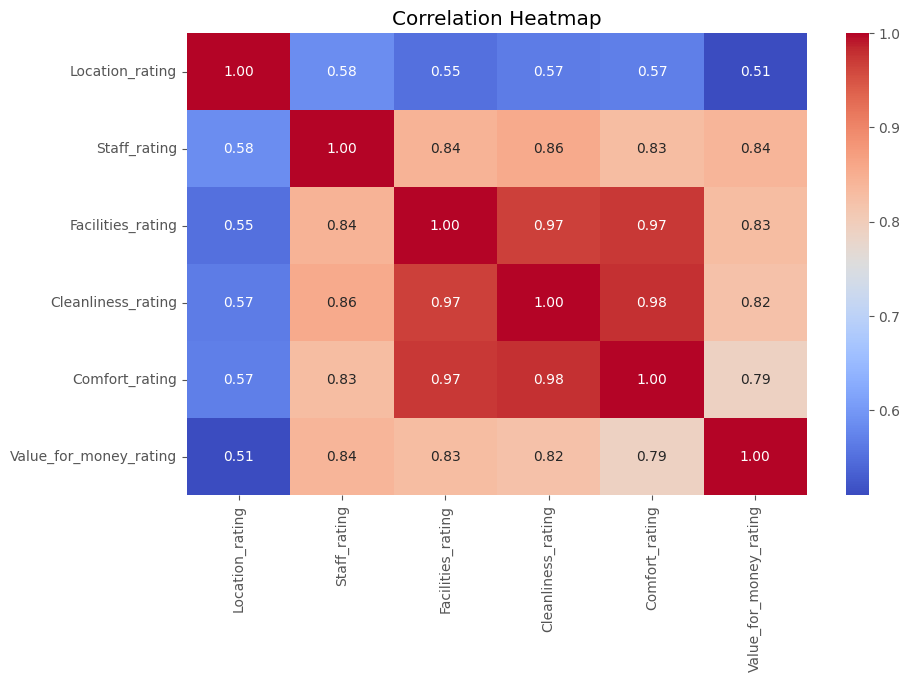

In [31]:
# Correlation Analysis
correlation_matrix = hotel_rooms[['Location_rating', 'Staff_rating', 'Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for correlation visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



Breakfast

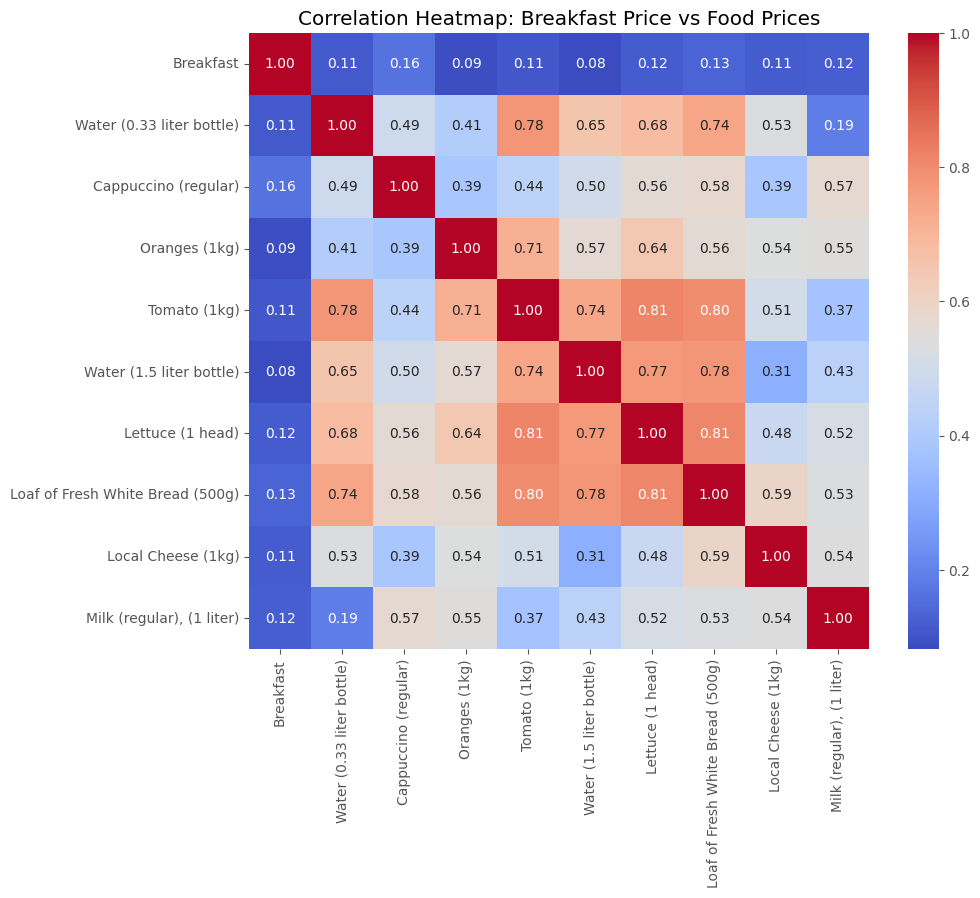

In [34]:
breakfast_available = hotel_rooms[hotel_rooms['Breakfast'] != -1]

food_columns = ['Water (0.33 liter bottle)', 'Cappuccino (regular)', 'Oranges (1kg)', 'Tomato (1kg)',
                'Water (1.5 liter bottle)', 'Lettuce (1 head)', 'Loaf of Fresh White Bread (500g)',
                'Local Cheese (1kg)', 'Milk (regular), (1 liter)']


correlation_matrix = breakfast_available[['Breakfast'] + food_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Breakfast Price vs Food Prices')
plt.show()

Cancellation

In [42]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(hotel_rooms['NbReviews'], hotel_rooms['Cancellation'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant relationship between NbReviews and Cancellation.")
else:
    print("There is no significant relationship between NbReviews and Cancellation.")

Chi-square statistic: 35712.62124034092
p-value: 0.0
Degrees of freedom: 3372
There is a significant relationship between NbReviews and Cancellation.


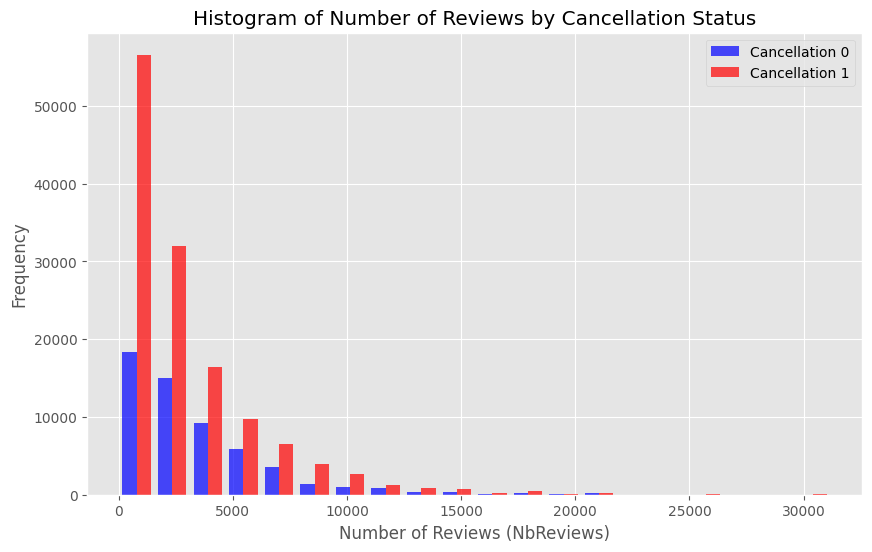

In [46]:
nb_reviews_available = hotel_rooms[hotel_rooms['NbReviews'] != -1]

# Create two histograms for NbReviews with separate counts for Cancellation 0 and 1
plt.figure(figsize=(10, 6))
plt.hist([nb_reviews_available[nb_reviews_available['Cancellation'] == 0]['NbReviews'],
          nb_reviews_available[nb_reviews_available['Cancellation'] == 1]['NbReviews']],
         bins=20, color=['blue', 'red'], label=['Cancellation 0', 'Cancellation 1'], alpha=0.7)

# Add labels and title
plt.xlabel('Number of Reviews (NbReviews)')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Reviews by Cancellation Status')
plt.legend()

# Show plot
plt.show()

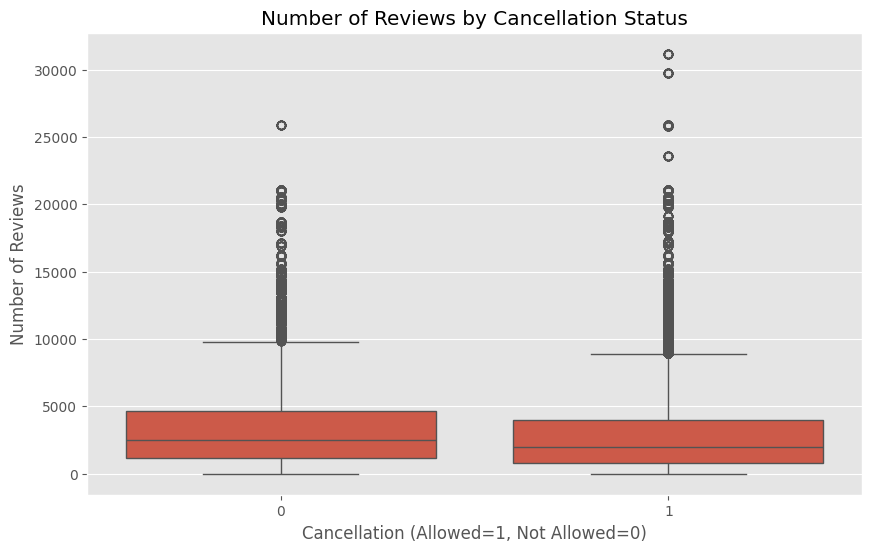

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancellation', y='NbReviews', data=nb_reviews_available)
plt.title('Number of Reviews by Cancellation Status')
plt.xlabel('Cancellation (Allowed=1, Not Allowed=0)')
plt.ylabel('Number of Reviews')
plt.show()

In [117]:
# # just the hotel rooms where the Region contains Asia
# asia = hotel_rooms[hotel_rooms["Region"].str.contains("Asia")].groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'}).reset_index()
# africa = hotel_rooms[hotel_rooms["Region"].str.contains("Africa")].groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'}).reset_index()
# europe = hotel_rooms[hotel_rooms["Region"].str.contains("Europe")].groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'}).reset_index()
# america = hotel_rooms[hotel_rooms["Region"].str.contains("America")].groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'}).reset_index()
# oceania = hotel_rooms[hotel_rooms["Region"].str.contains("Oceania")].groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'}).reset_index()


In [108]:
# city_popularity = asia.groupby('Country').agg({'NbReviews': 'sum', 'Score': 'mean','Tourism':'mean'})  # replace 'city', 'reviews', and 'ratings' with your actual column names
# city_popularity = city_popularity.reset_index()
# city_popularity = city_popularity.sort_values(by=['NbReviews', 'Score'], ascending=False)


In [114]:
# plt.figure(figsize=(10, 5))
# plt.bar(city_popularity.index, city_popularity['NbReviews'])
# plt.xlabel('City')
# plt.ylabel('Total Number of Reviews')
# plt.title('Popularity of Cities Based on Number of Reviews')
# plt.show()

In [115]:
# # graph of nb of reviews by population
# plt.scatter(city_popularity['Tourism'], city_popularity['NbReviews'])
# plt.xlabel('Tourism')
# plt.ylabel('Number of Reviews')
# plt.title('Number of Reviews by Population')
# plt.show()

In [8]:
# for continent in [asia,africa,europe,america,oceania]:
#     plt.figure(figsize=(10, 6))
#     bubble = sns.scatterplot(data=continent, x='Tourism', y='NbReviews', 
#                             size='Tourism', sizes=(20, 200),  # adjust size range as needed
#                             hue='NbReviews', palette='viridis', alpha=0.6)

#     # Add labels to the bubbles
#     for i in range(continent.shape[0]):
#         plt.text(continent['Tourism'].iloc[i], 
#                 continent['NbReviews'].iloc[i], 
#                 continent['Country'].iloc[i], 
#                 horizontalalignment='left', 
#                 size='small', color='black')

#     plt.xlabel('Tourism')
#     plt.ylabel('Number of Reviews')
#     plt.title('Number of Reviews by Tourism')
#     plt.colorbar(bubble.collections[0])
#     plt.show()

# Models


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from tools import *
import geopandas as gpd
import warnings
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',None)
with warnings.catch_warnings():
	warnings.simplefilter("ignore")

C:\Users\User\AppData\Local\Temp\ipykernel_15556\3293092871.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_full = generate_global_df()
display(df_full.shape)
display(df_full.head(2))

(155019, 91)

,Name,City,Country,Region,Continent,Location,Score,NbReviews,Distance from center,Stars,Url link,Staff_rating,Facilities_rating,Cleanliness_rating,Comfort_rating,Value_for_money_rating,Location_rating,Room Type,Guests nb,Price,Breakfast,Cancellation,Region Number,Continent Number,Price per Square Meter to Buy Apartment Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,"International Primary School, Yearly for 1 Child","Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child",1 Pair of Jeans (Levis 501 Or Similar),1 Pair of Men Leather Business Shoes,1 Pair of Nike Running Shoes (Mid-Range),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",Apples (1kg),Banana (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Bottle of Wine (Mid-Range),Chicken Fillets (1kg),Cigarettes 20 Pack (Marlboro),Domestic Beer (0.5 liter bottle),Eggs (regular) (12),Imported Beer (0.33 liter bottle)_x,Lettuce (1 head),Loaf of Fresh White Bread (500g),Local Cheese (1kg),"Milk (regular), (1 liter)",Onion (1kg),Oranges (1kg),Potato (1kg),"Rice (white), (1kg)",Tomato (1kg),Water (1.5 liter bottle),Apartment (1 bedroom) Outside of Centre,Apartment (1 bedroom) in City Centre,Apartment (3 bedrooms) Outside of Centre,Apartment (3 bedrooms) in City Centre,Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle)_y,McMeal at McDonalds (or Equivalent Combo Meal),"Meal for 2 People, Mid-range Restaurant, Three-course","Meal, Inexpensive Restaurant",Water (0.33 liter bottle),Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate","Cinema, International Release, 1 Seat","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),Gasoline (1 liter),Monthly Pass (Regular Price),One-way Ticket (Local Transport),Taxi 1hour Waiting (Normal Tariff),Taxi 1km (Normal Tariff),Taxi Start (Normal Tariff),Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car),Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car),"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment","Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",Mobile Phone Monthly Plan with Calls and 10GB+ Data,Population,Yearly Change,net_change,density,land_area,migrants,fert_rate,med_age,urban_pop,world_share,Tourism,Tourism_year
0,AC Hotel by Marriott San Juan Condado,San Juan,Puerto Rico,Caribbean,America,"Condado, San Juan",8.2,"1,398",5.3,4,https://www.booking.com/hotel/pr/ac-hotel-marr...,8.7,8.5,8.7,8.7,7.8,8.9,King Executive Room with Balcony,2,342.0,23.0,1.0,29,19,NaN,NaN,10508.4,442.32,44.57,101.06,80.81,42.22,5.28,2.26,12.57,16.89,8.19,9.92,2.05,5.18,2.6,2.34,3.34,7.93,1.97,2.68,NaN,4.01,2.43,4.4,1.73,822.85,1767.04,1497.59,2562.14,3.3,1.84,3.28,4.69,8.55,75.06,18.77,1.56,2053.2,4.7,8.91,43.78,NaN,0.96,NaN,NaN,NaN,NaN,NaN,23674.39,NaN,297.47,65.25,72.97,3260314.0,0.24,7907.0,368,8870.0,19835.0,1.3,44.0,NaN,0.04,3882000,2020
1,AC Hotel by Marriott San Juan Condado,San Juan,Puerto Rico,Caribbean,America,"Condado, San Juan",8.2,"1,398",5.3,4,https://www.booking.com/hotel/pr/ac-hotel-marr...,8.7,8.5,8.7,8.7,7.8,8.9,King Executive Room with Balcony,2,379.0,0.0,1.0,29,19,NaN,NaN,10508.4,442.32,44.57,101.06,80.81,42.22,5.28,2.26,12.57,16.89,8.19,9.92,2.05,5.18,2.6,2.34,3.34,7.93,1.97,2.68,NaN,4.01,2.43,4.4,1.73,822.85,1767.04,1497.59,2562.14,3.3,1.84,3.28,4.69,8.55,75.06,18.77,1.56,2053.2,4.7,8.91,43.78,NaN,0.96,NaN,NaN,NaN,NaN,NaN,23674.39,NaN,297.47,65.25,72.97,3260314.0,0.24,7907.0,368,8870.0,19835.0,1.3,44.0,NaN,0.04,3882000,2020


In [4]:
display(df_full.columns)

Index(['Name', 'City', 'Country', 'Region', 'Continent', 'Location', 'Score',
       'NbReviews', 'Distance from center', 'Stars', 'Url link',
       'Staff_rating', 'Facilities_rating', 'Cleanliness_rating',
       'Comfort_rating', 'Value_for_money_rating', 'Location_rating',
       'Room Type', 'Guests nb', 'Price', 'Breakfast', 'Cancellation',
       'Region Number', 'Continent Number',
       'Price per Square Meter to Buy Apartment Outside of Centre',
       'Price per Square Meter to Buy Apartment in City Centre',
       'International Primary School, Yearly for 1 Child',
       'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Pair of Men Leather Business Shoes',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)', 'Apples (1kg)',
       'Banana (1kg)', 'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',
       'Bottle of Wine (Mid-Range)', 

Predict Score based on ratings

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature variables and the target variable
features = ['Staff_rating', 'Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating', 'Location_rating']
target = 'Score'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_full[features], df_full[target], test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.016314137510291687


Predict Scores Based on 'City', 'Country', 'Region', 'Continent', 'Location', 'Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating', 'Location_rating'

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the feature variables and the target variable
features = ['City', 'Country', 'Region', 'Continent', 'Location', 'Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating', 'Location_rating']
target = 'Score'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_full[features], df_full[target], test_size=0.8, random_state=42)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Facilities_rating', 'Cleanliness_rating', 'Comfort_rating', 'Value_for_money_rating', 'Location_rating']),
        ('cat', OneHotEncoder(), ['City', 'Country', 'Region', 'Continent']),
    ])

# Fit and transform the training data and transform the testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.013851121377742956


In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9691237901236799


In [8]:
# with cross val

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Score: {scores.mean()}')
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Cross-Validation Scores: [0.97225056 0.97143674 0.96811589 0.96665425 0.96445989]
Average Score: 0.9685834674892637
Mean Squared Error: 0.01384579862015531
R^2 Score: 0.9691356553420918


Predict the Price based on the city's food prices

In [13]:
feature_cols = [
    'Imported Beer (0.33 liter bottle)_y',
 'Apartment (3 bedrooms) in City Centre',
 'Apartment (3 bedrooms) Outside of Centre',
 'Apartment (1 bedroom) in City Centre',
 'Fitness Club, Monthly Fee for 1 Adult',
 'Cinema, International Release, 1 Seat',
 'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
 'Rice (white), (1kg)',
 'Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
 'Oranges (1kg)',
 
]

target_col = 'Price'
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}") # not good

Mean Squared Error: 97281.17088503366


In [14]:
from sklearn.svm import SVR
model = SVR()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Predict the Continent based on 'NbReviews', 'Stars','Staff_rating', 'Facilities_rating', 'Cleanliness_rating','Comfort_rating', 'Value_for_money_rating','Location_rating', 'Price'


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

feature_cols = [ 'Stars', 'Staff_rating', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price']

target_col = 'Continent'
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}") # okay not bad

Accuracy: 0.7796090826990065


In [14]:
# classification 2:

feature_cols = [ 'Stars', 'Staff_rating', 'Facilities_rating', 'Cleanliness_rating',
                'Comfort_rating', 'Value_for_money_rating', 'Location_rating', 'Price',]

target_col = 'Continent'
cols = feature_cols + [target_col]
tmp_df = df_full[cols].dropna()

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7796090826990065


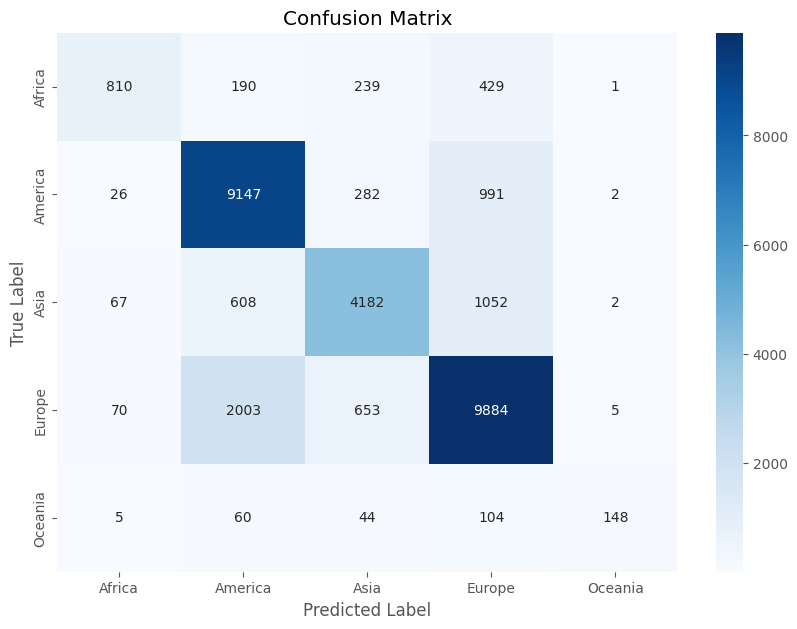

In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      Africa       0.83      0.49      0.61      1669
     America       0.76      0.88      0.81     10448
        Asia       0.77      0.71      0.74      5911
      Europe       0.79      0.78      0.79     12615
     Oceania       0.94      0.41      0.57       361

    accuracy                           0.78     31004
   macro avg       0.82      0.65      0.70     31004
weighted avg       0.78      0.78      0.78     31004



In [18]:
# builduing our own model using pytorch:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define your dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define your neural network model
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        x = self.fc(x)
        return x

X_train, X_test, y_train, y_test = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train = y_train_encoded.astype(np.int64)
y_test = y_test_encoded.astype(np.int64)

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

model = MyModel(input_size=len(feature_cols), output_size=len(tmp_df[target_col].unique()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_targets = []
for inputs, targets in test_loader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.tolist())
    all_targets.extend(targets.tolist())

accuracy = accuracy_score(all_targets, all_preds)
print(f"Accuracy: {accuracy}")



Accuracy: 0.5024512966068895


In [22]:
## with val

X_train, X_temp, y_train, y_temp = train_test_split(tmp_df[feature_cols], tmp_df[target_col], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train = y_train_encoded.astype(np.int64)
y_val = y_val_encoded.astype(np.int64)
y_test = y_test_encoded.astype(np.int64)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

model = MyModel(input_size=len(feature_cols), output_size=len(tmp_df[target_col].unique()))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_preds = []
    val_targets = []
    for inputs, targets in val_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        val_preds.extend(preds.tolist())
        val_targets.extend(targets.tolist())
    val_accuracy = accuracy_score(val_targets, val_preds)
    print(f"Epoch: {epoch+1}, Validation Accuracy: {val_accuracy}")

# Evaluation
model.eval()
all_preds = []
all_targets = []
for inputs, targets in test_loader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.tolist())
    all_targets.extend(targets.tolist())

accuracy = accuracy_score(all_targets, all_preds)
print(f"Test Accuracy: {accuracy}")

Epoch: 1, Validation Accuracy: 0.4516836537221004
Epoch: 2, Validation Accuracy: 0.48892616006536793
Epoch: 3, Validation Accuracy: 0.460671741280695
Epoch: 4, Validation Accuracy: 0.5079774652732981
Epoch: 5, Validation Accuracy: 0.4241603233991313
Epoch: 6, Validation Accuracy: 0.4546940179761751
Epoch: 7, Validation Accuracy: 0.4992044037328517
Epoch: 8, Validation Accuracy: 0.5060852363135939
Epoch: 9, Validation Accuracy: 0.4159463295058702
Epoch: 10, Validation Accuracy: 0.49804326323485143
Test Accuracy: 0.5057841998881865


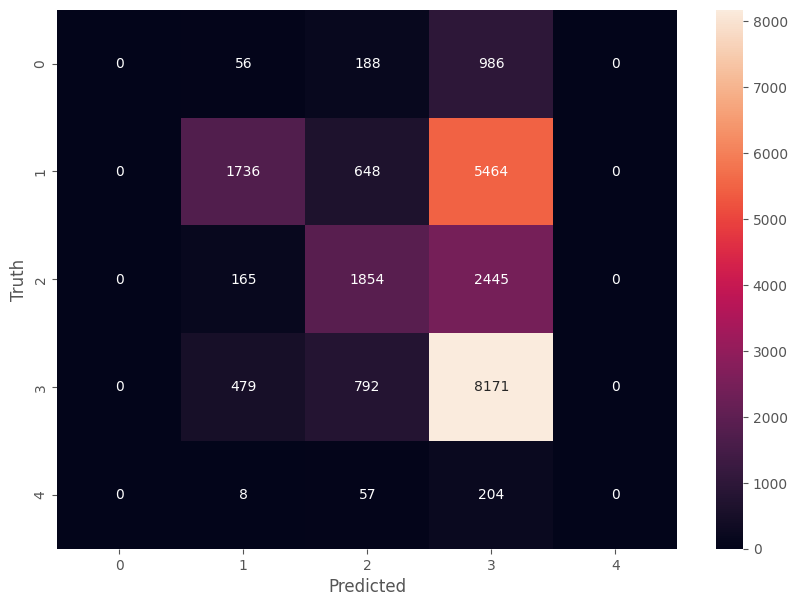

In [23]:
# Confusion Matrix
cm = confusion_matrix(all_targets, all_preds)

# Plotting
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()